<a href="https://www.kaggle.com/code/ellekayem/notebookc0bfec0386?scriptVersionId=128116003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Visualization

### Analysis by Lauren Main

### Feature Tasks Version 1.0

Using two datasets load and analyze the data.

Summarize your insights. 

Visualize your insights with at least two illustrations per set. 



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
glue = sns.load_dataset("glue")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


## First Look at the Glue data

How are the models scores changing over the 3 year's worth of data collected and is the encoder a signifcant factor in the scores? 

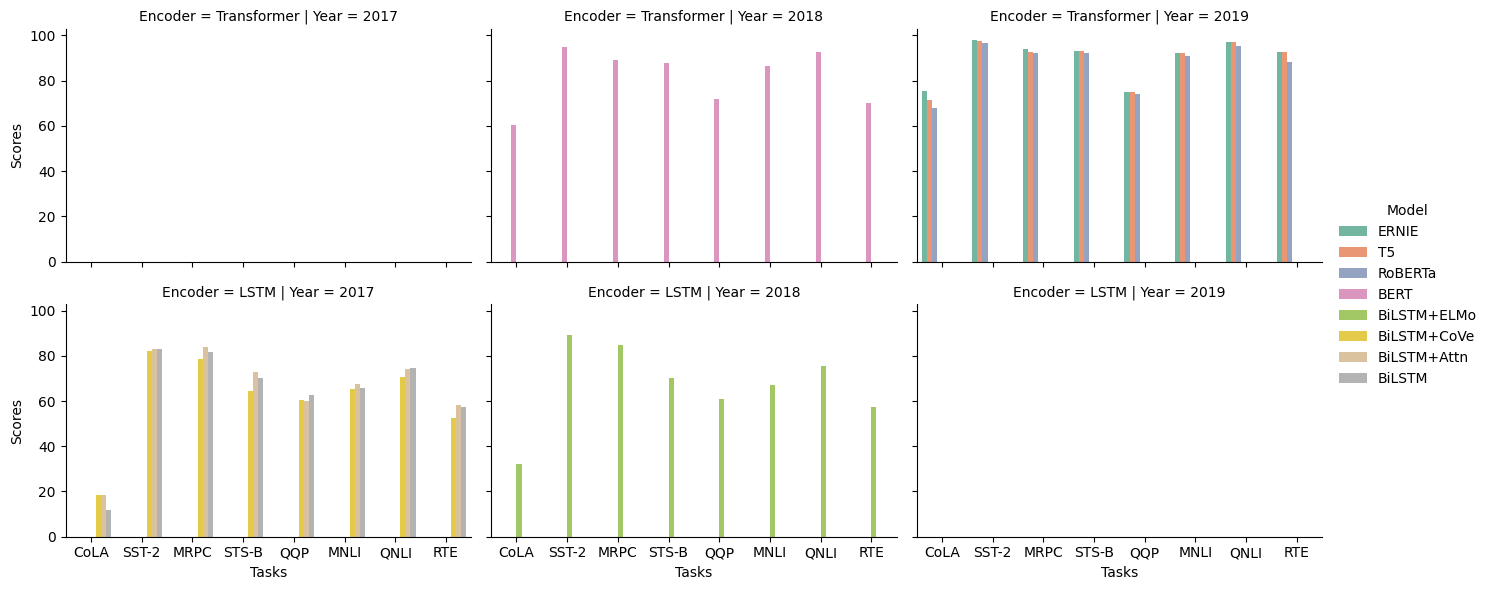

In [3]:
glue_df = sns.catplot(
data= glue,
kind = 'bar',
x = 'Task',
y ='Score',
hue = 'Model',
col = 'Year',
row = 'Encoder',
height=3,
aspect = 1.5,
palette='Set2')

glue_df.set_axis_labels('Tasks', 'Scores')
glue_df

## First Conclusions

At the start of this dataset, the Transformer encoder is not being used.  However, later on LSTM is not being used and the Transformer encoder is being used by most models. The 2018 dataset is only represented by two models, each using different encoders. 

## Additional Insights

While the above illustration helps us understand more about what the data looks like, it would be more interesting to see the trend of the model's scores over time. In the time of ChatGPT, let's check out the data from 4 years ago.

<AxesSubplot: xlabel='Year', ylabel='Score'>

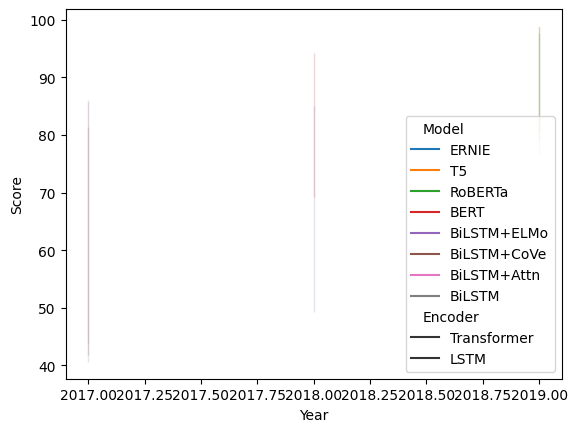

In [4]:
sns.lineplot(x='Year', y='Score', hue='Model', style='Encoder', errorbar='sd', linewidth=20, dashes=False, data=glue)